#Logistic Regression

Importing libraries

In [1]:
import pandas as pd
import numpy as np

Loading the dataset

In [2]:
df_test=pd.read_csv('/content/Titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df_train=pd.read_csv('/content/Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


EDA

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


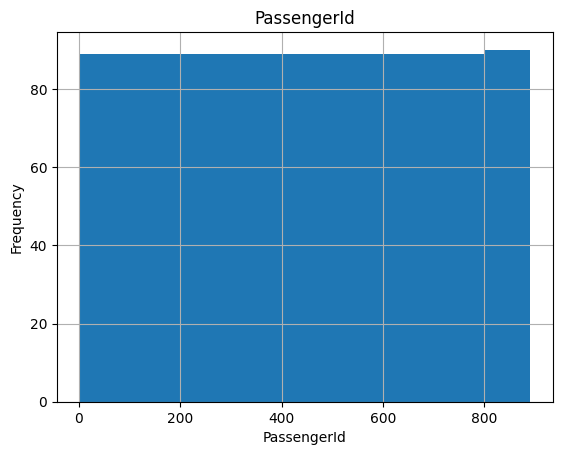

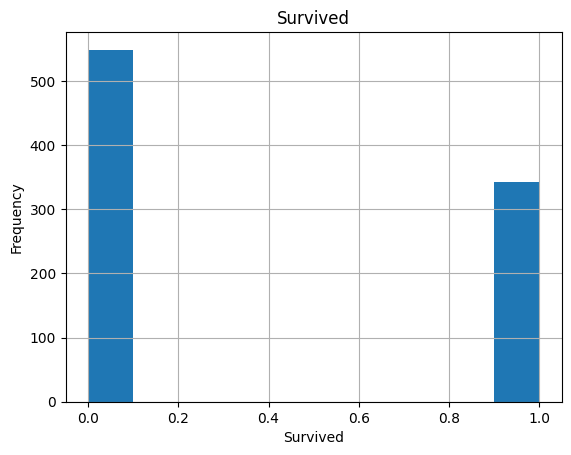

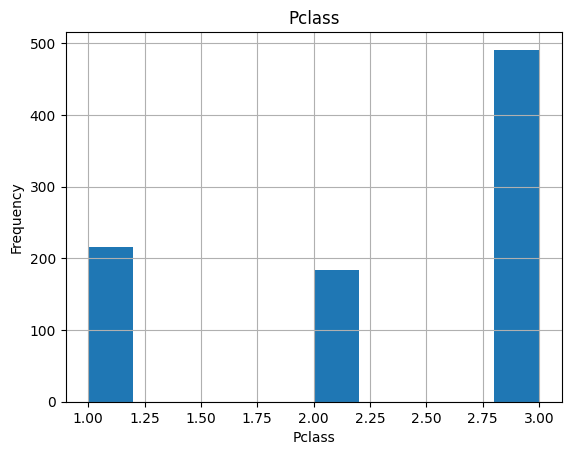

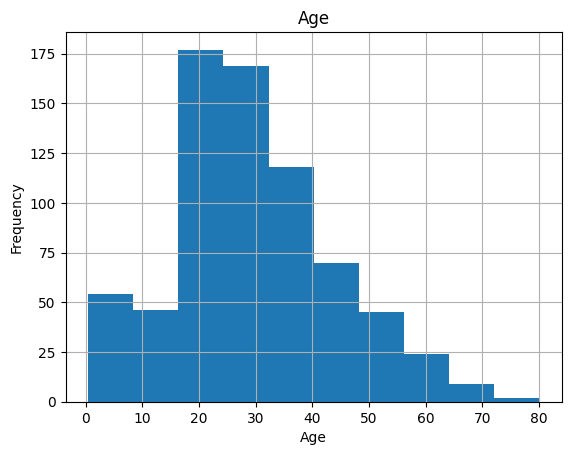

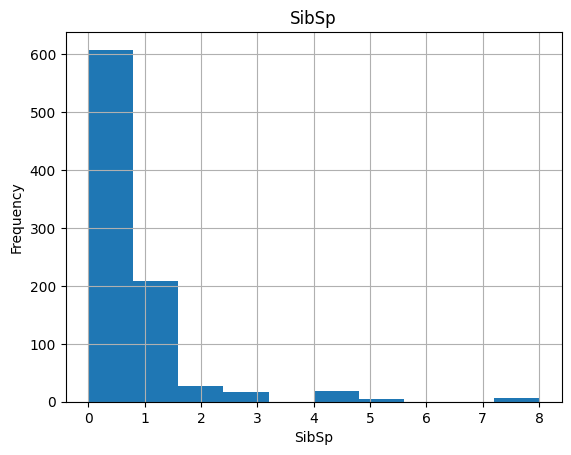

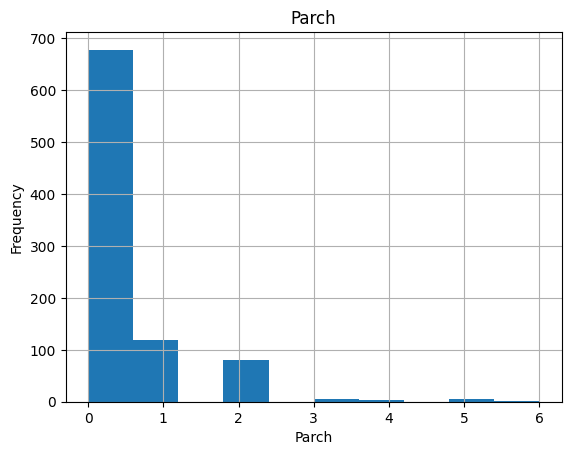

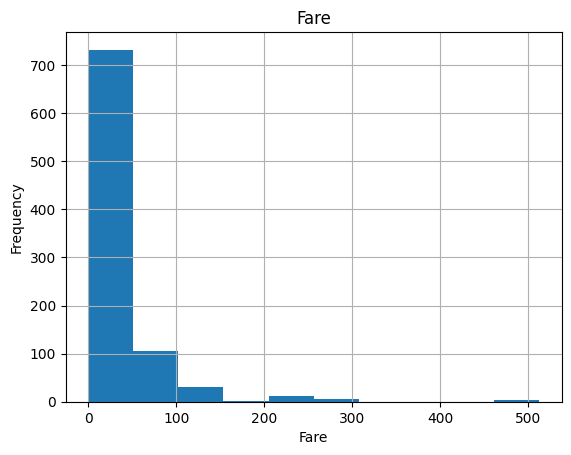

In [8]:
#histograms of training data
import matplotlib.pyplot as plt
numerical_cols = df_train.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
  df_train[col].hist()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()

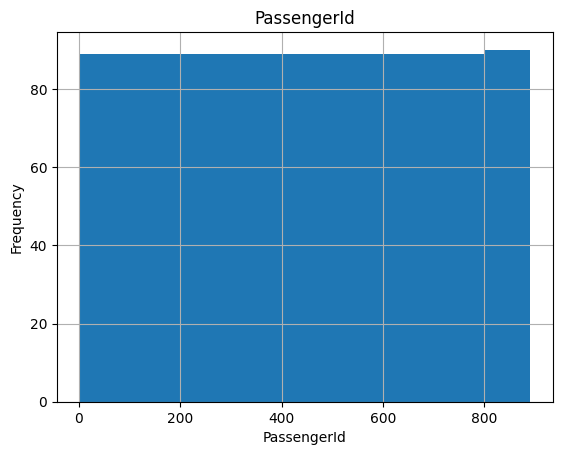

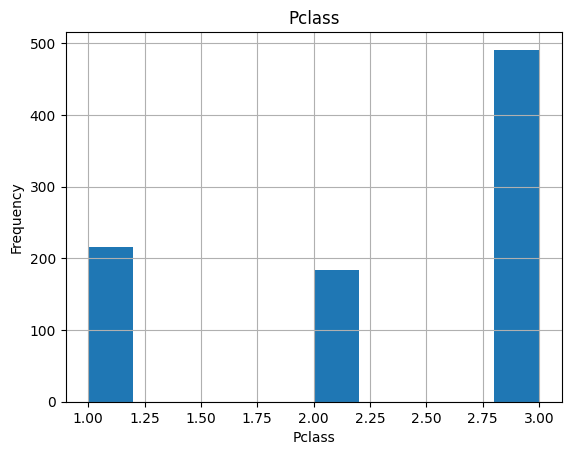

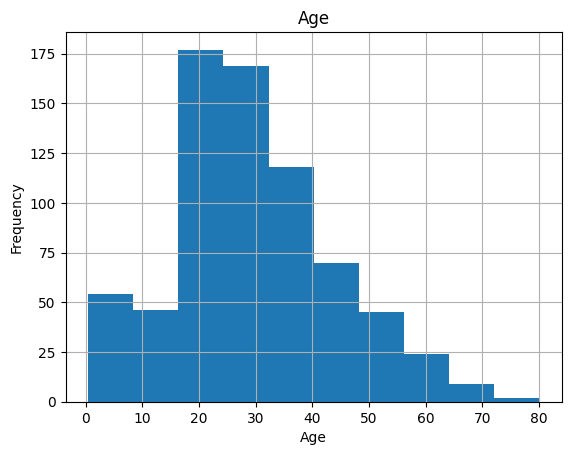

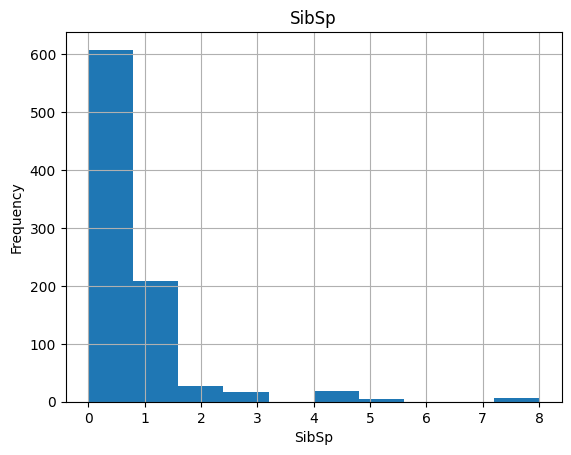

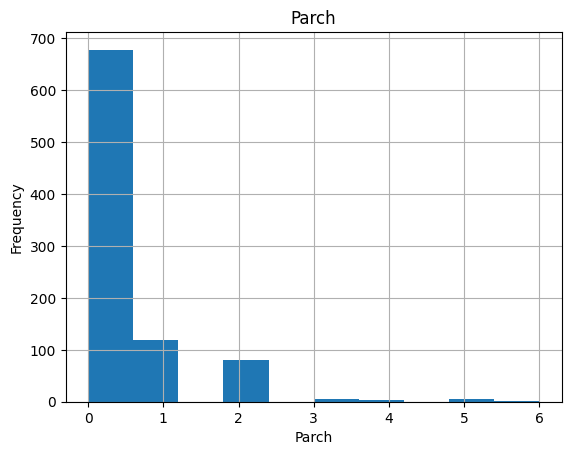

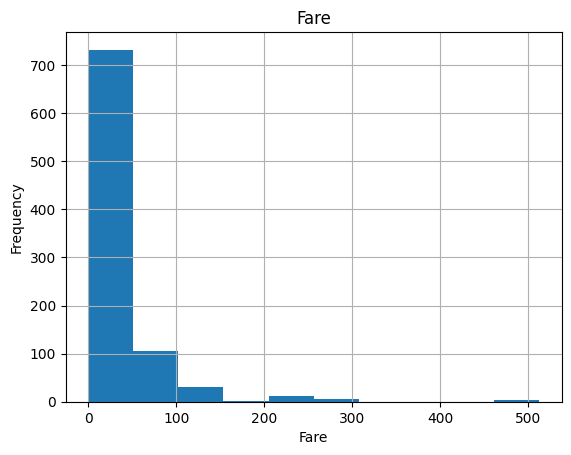

In [9]:
#histograms for testing data
numerical_cols = df_test.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
  df_train[col].hist()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()

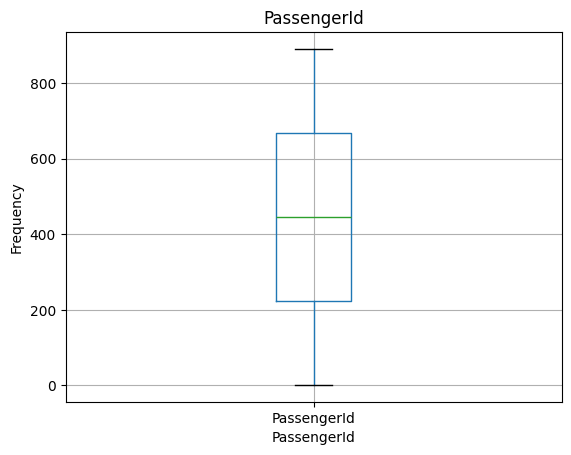

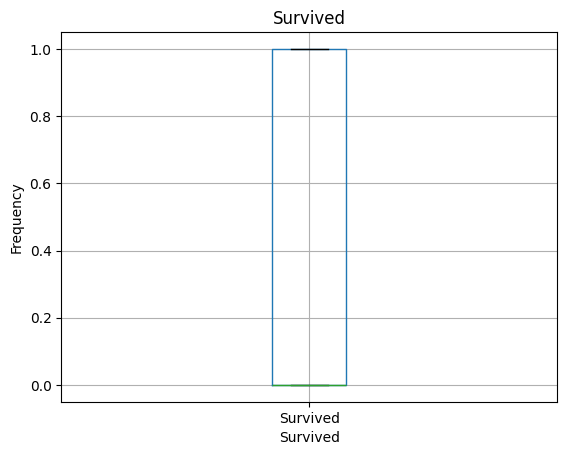

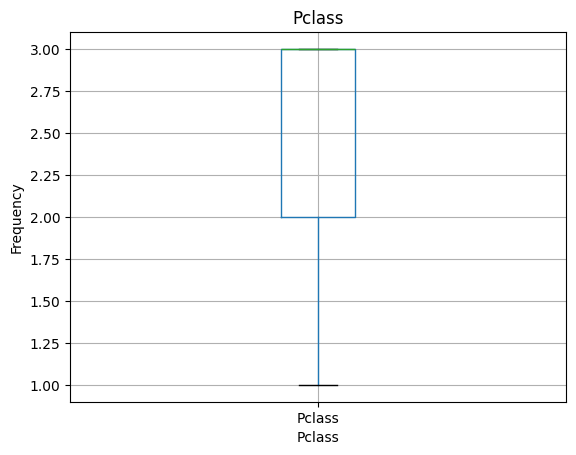

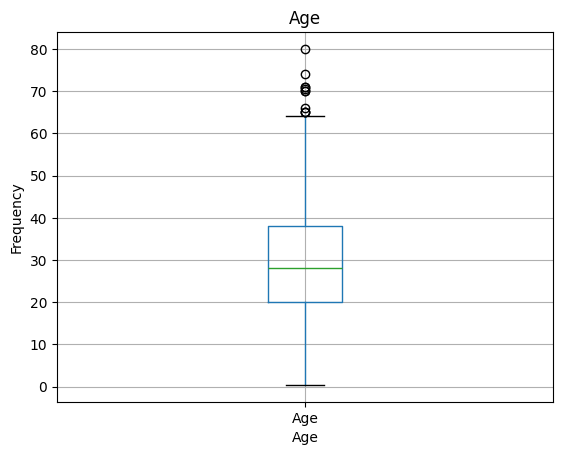

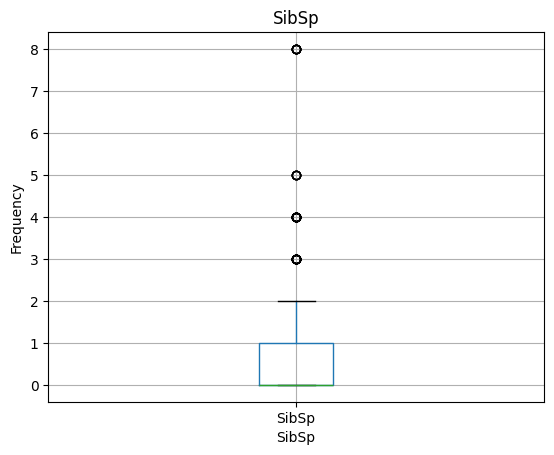

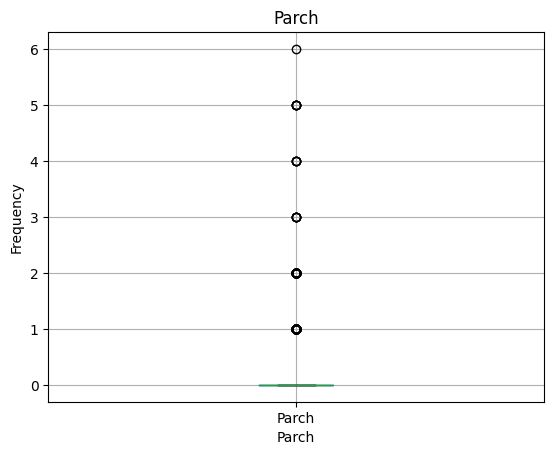

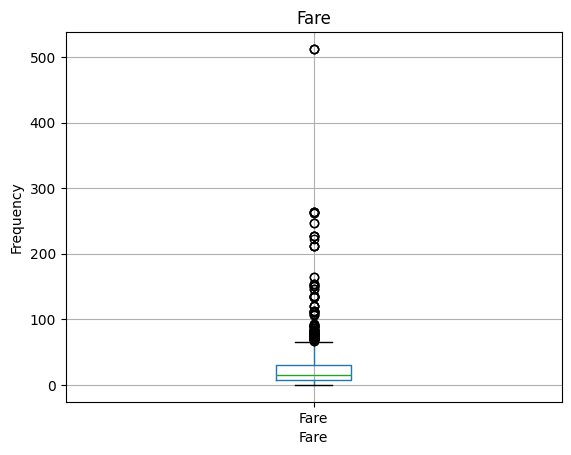

In [10]:
#box plots for training data
numerical_cols = df_train.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
  df_train.boxplot(column=col)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()

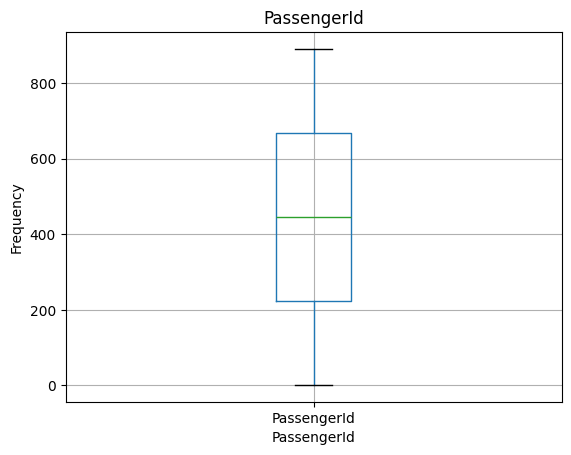

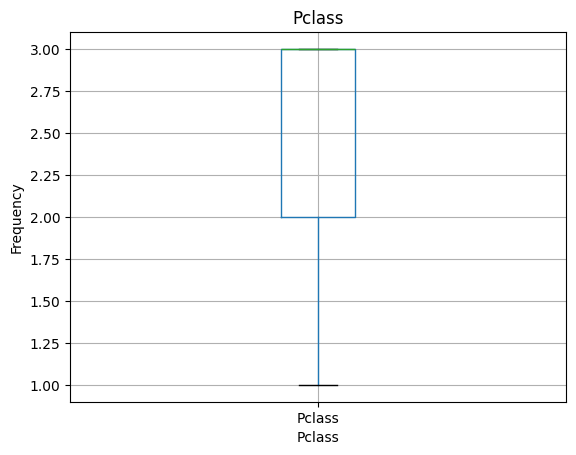

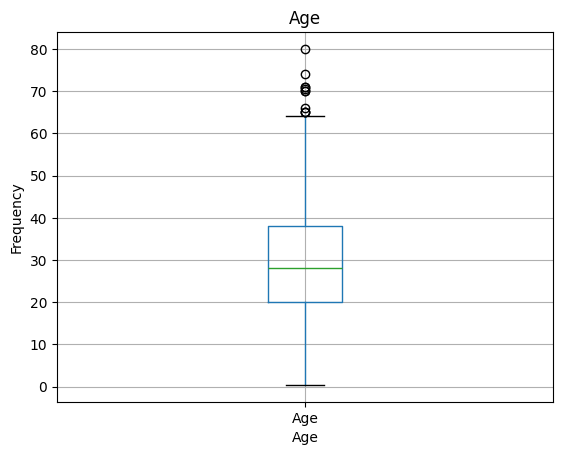

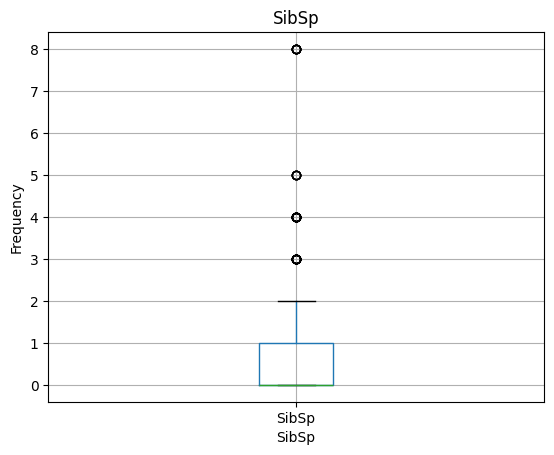

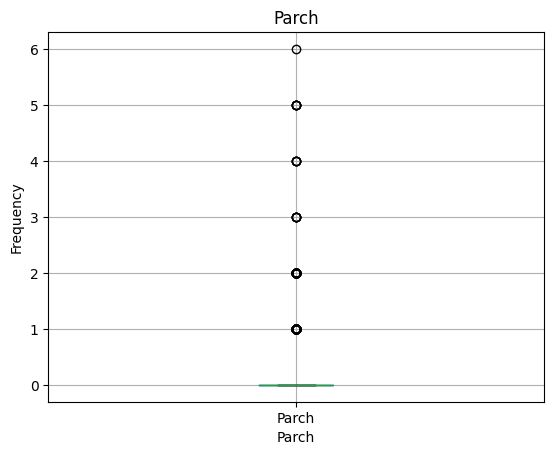

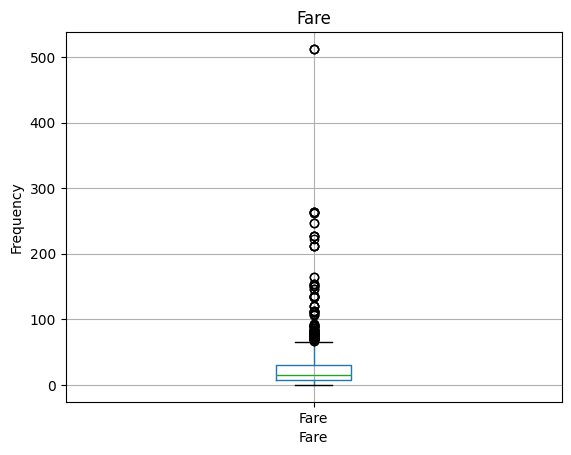

In [11]:
#box plots for testing data
numerical_cols = df_test.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
  df_train.boxplot(column=col)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()

Data Preprocessing

In [12]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
#impute missing values
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0],inplace=True)
df_train.isnull().sum()

/tmp/ipython-input-3502544621.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
/tmp/ipython-input-3502544621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [15]:
#impute missing values
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_test['Cabin'].fillna(df_test['Cabin'].mode()[0],inplace=True)
df_test.isnull().sum()

/tmp/ipython-input-3194618169.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
/tmp/ipython-input-3194618169.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [16]:
# Remove outliers using IQR
numerical_cols = df_train.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
  Q1 = df_train[col].quantile(0.25)
  Q3 = df_train[col].quantile(0.75)
  IQR = Q3 - Q1
  df_train = df_train[~((df_train[col] < (Q1 - 1.5 * IQR)) | (df_train[col] > (Q3 + 1.5 * IQR)))]

numerical_cols = df_test.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
  Q1 = df_test[col].quantile(0.25)
  Q3 = df_test[col].quantile(0.75)
  IQR = Q3 - Q1
  df_test = df_test[~((df_test[col] < (Q1 - 1.5 * IQR)) | (df_test[col] > (Q3 + 1.5 * IQR)))]

Data Transformation

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  561 non-null    int64  
 1   Survived     561 non-null    int64  
 2   Pclass       561 non-null    int64  
 3   Name         561 non-null    object 
 4   Sex          561 non-null    object 
 5   Age          561 non-null    float64
 6   SibSp        561 non-null    int64  
 7   Parch        561 non-null    int64  
 8   Ticket       561 non-null    object 
 9   Fare         561 non-null    float64
 10  Cabin        561 non-null    object 
 11  Embarked     561 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 57.0+ KB


In [18]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Name']=le.fit_transform(df_train['Name'])
df_train['Sex']=le.fit_transform(df_train['Sex'])
df_train['Ticket']=le.fit_transform(df_train['Ticket'])
df_train['Embarked']=le.fit_transform(df_train['Embarked'])
df_train['Cabin']=le.fit_transform(df_train['Cabin'])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,57,1,22.000000,1,0,409,7.2500,17,2
2,3,1,3,205,0,26.000000,0,0,512,7.9250,17,2
3,4,1,1,157,0,35.000000,1,0,32,53.1000,23,2
4,5,0,3,11,1,35.000000,0,0,366,8.0500,17,2
5,6,0,3,345,1,29.699118,0,0,196,8.4583,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,496,1,25.000000,0,0,493,7.0500,17,2
886,887,0,2,341,1,27.000000,0,0,59,13.0000,17,2
887,888,1,1,175,0,19.000000,0,0,9,30.0000,12,2
889,890,1,1,42,1,26.000000,0,0,3,30.0000,27,0


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 0 to 416
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  271 non-null    int64  
 1   Pclass       271 non-null    int64  
 2   Name         271 non-null    object 
 3   Sex          271 non-null    object 
 4   Age          271 non-null    float64
 5   SibSp        271 non-null    int64  
 6   Parch        271 non-null    int64  
 7   Ticket       271 non-null    object 
 8   Fare         271 non-null    float64
 9   Cabin        271 non-null    object 
 10  Embarked     271 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 25.4+ KB


In [20]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['Name']=le.fit_transform(df_test['Name'])
df_test['Sex']=le.fit_transform(df_test['Sex'])
df_test['Ticket']=le.fit_transform(df_test['Ticket'])
df_test['Cabin']=le.fit_transform(df_test['Cabin'])
df_test['Embarked']=le.fit_transform(df_test['Embarked'])
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,131,1,34.50000,0,0,102,7.8292,8,1
1,893,3,260,0,47.00000,1,0,163,7.0000,8,2
3,895,3,263,1,27.00000,0,0,97,8.6625,8,2
5,897,3,236,1,14.00000,0,0,195,9.2250,8,2
6,898,3,55,0,30.00000,0,0,108,7.6292,8,1
...,...,...,...,...,...,...,...,...,...,...,...
410,1302,3,180,0,30.27259,0,0,170,7.7500,8,1
412,1304,3,109,0,28.00000,0,0,130,7.7750,8,2
413,1305,3,231,1,30.27259,0,0,201,8.0500,8,2
415,1307,3,220,1,38.50000,0,0,250,7.2500,8,2


Model Building

In [21]:
#define features and target variable
X=df_train.drop('Survived',axis=1)
Y=df_train['Survived']

In [22]:
#standardize and apply logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
model=make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X,Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [23]:
df_train["predict_proba"]=model.predict_proba(X)[:,1]

In [24]:
#predict training and testing data
y_pred_train=model.predict(X)
y_pred_test=model.predict(df_test)

Model Evaluation

In [25]:
#evaluate metrics
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,log_loss

In [26]:
cm_train=confusion_matrix(Y,y_pred_train)
cm_train

array([[352,  48],
       [ 53, 108]])

In [27]:
accuracy_train=accuracy_score(Y,y_pred_train)
print(f"Training Accuracy: {np.round(accuracy_train,2)}")

Training Accuracy: 0.82


In [28]:
precision_score_train=precision_score(Y,y_pred_train)
print(f"Training Precision: {np.round(precision_score_train,2)}")

Training Precision: 0.69


In [29]:
recall_score_train=recall_score(Y,y_pred_train)
print(f"Training Recall: {np.round(recall_score_train,2)}")

Training Recall: 0.67


In [30]:
f1_score_train=f1_score(Y,y_pred_train)
print(f"Training F1 Score: {np.round(f1_score_train,2)}")

Training F1 Score: 0.68


In [31]:
specificiy_train=cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print(f"Training Speicifity: {np.round(specificiy_train,2)}")

Training Speicifity: 0.88


In [32]:
log_loss_train=log_loss(Y,y_pred_train)
print(f"Training Log Loss: {np.round(log_loss_train,2)}")

Training Log Loss: 6.49


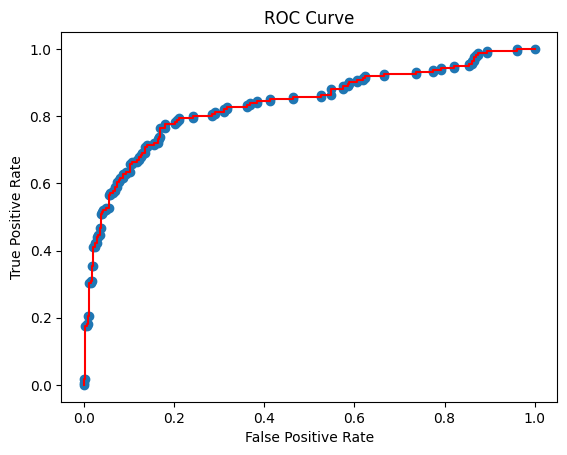

AUC Score: 0.84


In [33]:
from sklearn.metrics import roc_curve,roc_auc_score

TPR,FPR,dummy=roc_curve(Y,df_train["predict_proba"])
plt.scatter(TPR,FPR)
plt.plot(TPR,FPR,color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

auc_score=roc_auc_score(Y,df_train["predict_proba"])
print(f"AUC Score: {np.round(auc_score,2)}")

we can calculate the metrics only on the training data because there is no target variable in the testing ,hence we can only fit the data using training data and make predictions.

Interpretation

In [34]:
#interpreting the coefficients
# Access the logistic regression model from the pipeline
logistic_model = model.named_steps['logisticregression']
scaler = model.named_steps['standardscaler']

# Get the feature names after scaling
feature_names = scaler.get_feature_names_out()

# Get the coefficients
coefficients = logistic_model.coef_[0]

# Display the coefficients with their corresponding feature names
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

PassengerId: -0.0940
Pclass: -0.5754
Name: 0.0614
Sex: -1.2113
Age: -0.1429
SibSp: -0.0797
Parch: 0.0000
Ticket: 0.0032
Fare: 0.0532
Cabin: 0.3306
Embarked: -0.2315


In [35]:
# Create a submission DataFrame
submission_df = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred_test})

# Display the first few rows of the submission DataFrame
display(submission_df.head())

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
3,895,0
5,897,0
6,898,0


#Answers for Interview Questions:

* Recall is defined as from overall actual positives how many our machine predicted them as positives,percentage of positives that are successfully classified as positives,formula is TRP=TP/(TP+FN).Precision is defined as from the model predicted positives how many are real positives,the approach here is to find what percentage of model's positive predictions are accurate.

* Cross validation is validating the model n number of times to get a better result,it is important in binary classification because when we are tarining our model some n number of times the classes will be accurately classified which gives us better accuracy score.